* Importing pandas and sqlite3
* Connecting to DB and using *pandas.read_sql_query()* to return information of tables in DB
* *pandas.read_sql_query()* is used because it can read the query and return the result in form of table

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('factbook.db')
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


A query that returns first 5 rows of the *facts* table in DB and using pandas to read that query 

In [2]:
q1 = 'SELECT * FROM facts LIMIT 5;'
pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


A single query that returns the:
    * Minimum population
    * Maximum population
    * Minimum population growth
    * Maximum population growth

In [3]:
q2 = 'SELECT MIN(Population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;'
pd.read_sql_query(q2, conn)

,MIN(Population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
#A query that returns the countrie(s) with a population of 0.
q3 = 'SELECT * FROM facts WHERE population == (select max(population) from facts);'
pd.read_sql_query(q3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [5]:
#A query that returns the countrie(s) with a population of 7256490011.
q4 = 'SELECT * FROM facts WHERE population == (select max(population) from facts);'
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ab8269b38>,
      dtype=object)

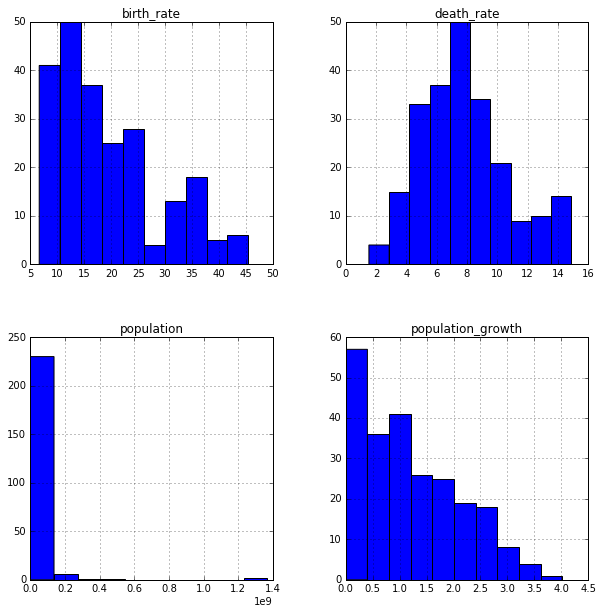

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
q5 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population NOT IN (0,7256490011);
'''
pd.read_sql_query(q5, conn).hist(ax=ax)

In [7]:
#Countries having highest population density
q6 = "select name, cast(population as float)/cast(area as float) population_density from facts order by population_density desc limit 11;"
pd.read_sql_query(q6, conn)

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


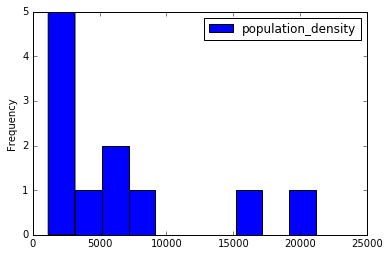

In [8]:
q7 = "select cast(population as float)/cast(area as float) population_density from facts order by population_density desc limit 11;"
pd.read_sql_query(q7, conn).plot(kind = 'hist')